### Research Objectives:
1. Determine the relationship between the students’ debugging scores and the quality of discourse
2. Determine the performance distribution given the respective achievement level of the pair programmers

#### Relationship between students’ debugging performances with respect to his/her discourse quality
- Correlate the debugging scores and discourse quality such as the discourse classes and volume
- Fit a regression model and determine levels of contribution of variables to the debugging score
- Replicate the aforementioned steps but using differences of debugging scores of the pair programmers

### to try:
- group acts by main acts: inf, res, imp, eli, arg
- group by sex
- group by dynamic, static

In [34]:
# Importing packages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
# Directories
data_dir = "data/"
data_proc_dir = data_dir + "proc/"

In [27]:
stud_df = pd.read_csv(data_proc_dir + "student_data.csv", index_col="student").dropna()

In [4]:
stud_df.head()

,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,EliOpn,EliPrp,EliSet,EliVer,ImpAct,...,ResDen,ResSol,ResStm,school,static_or_dynamic,individual_or_pair,gender,pre_test_score,self_efficacy,debugging_scores
student,,,,,,,,,,,,,,,,,,,,,
ADDU-DP01A,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,3.0,4.0,...,0.0,1.0,1.0,ADDU,Dynamic,Pair,M,8.0,5.53,25.0
ADDU-DP01B,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,3.0,2.0,ADDU,Dynamic,Pair,M,9.0,5.56,22.0
ADDU-DP02A,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,13.0,6.0,...,1.0,3.0,3.0,ADDU,Dynamic,Pair,F,6.0,4.88,13.0
ADDU-DP03A,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,ADDU,Dynamic,Pair,M,8.0,5.06,17.0
ADDU-DP03B,0.0,0.0,0.0,1.0,0.0,4.0,3.0,0.0,6.0,7.0,...,1.0,11.0,4.0,ADDU,Dynamic,Pair,F,4.0,3.53,10.0


In [5]:
cols_classes = ['ArgCcl', 'ArgCnt', 'ArgCon', 'ArgEla', 'ArgRsn', 'EliOpn', 'EliPrp', 'EliSet', 'EliVer',
                'ImpAct', 'ImpFoc', 'InfAct', 'InfNeg', 'InfNeu', 'InfNon', 'InfPos', 'InfSoc', 'InfSol',
                'InfStm', 'ResCfm', 'ResDen','ResSol', 'ResStm']
class_group = ['Arg', 'Eli', 'Imp', 'Inf', 'Res']
cols_classes_groups = ['grp_' + grp for grp in class_group]
cols_tests = ['pre_test_score', 'self_efficacy', 'debugging_scores']

In [6]:
for group in class_group:
    stud_df['grp_' + group] = stud_df[stud_df.columns[pd.Series(stud_df.columns).str.startswith(group)]].sum(1)
    
stud_df[cols_classes_groups + cols_classes]

,grp_Arg,grp_Eli,grp_Imp,grp_Inf,grp_Res,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,...,InfNeu,InfNon,InfPos,InfSoc,InfSol,InfStm,ResCfm,ResDen,ResSol,ResStm
student,,,,,,,,,,,,,,,,,,,,,
ADDU-DP01A,1.0,7.0,7.0,18.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,0.0,2.0,1.0,2.0,3.0,0.0,1.0,1.0
ADDU-DP01B,0.0,3.0,4.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,3.0,5.0,4.0,0.0,3.0,2.0
ADDU-DP02A,0.0,23.0,8.0,29.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,9.0,11.0,3.0,1.0,3.0,3.0
ADDU-DP03A,1.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
ADDU-DP03B,1.0,13.0,8.0,28.0,22.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,2.0,0.0,4.0,12.0,6.0,1.0,11.0,4.0
ADDU-DP05A,3.0,17.0,9.0,24.0,4.0,0.0,0.0,2.0,1.0,0.0,...,0.0,6.0,3.0,1.0,4.0,5.0,3.0,0.0,0.0,1.0
ADDU-DP06A,0.0,21.0,24.0,41.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,1.0,1.0,0.0,7.0,8.0,2.0,16.0,4.0
ADDU-DP06B,0.0,5.0,6.0,25.0,15.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,5.0,7.0,2.0,10.0,3.0,0.0,2.0
ADDU-DP07A,0.0,5.0,7.0,23.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,7.0,0.0,5.0,7.0,0.0,1.0,5.0


## Corellation

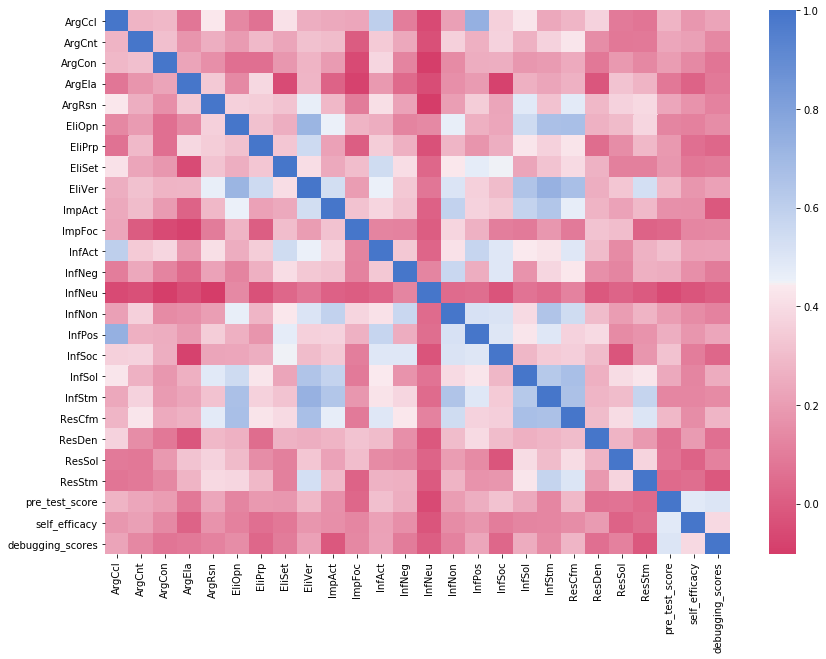

In [7]:
plt.figure(figsize=(14,10))

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
corr_res = stud_df[cols_classes+cols_tests].corr()
sns.heatmap(corr_res, cmap=cmap)

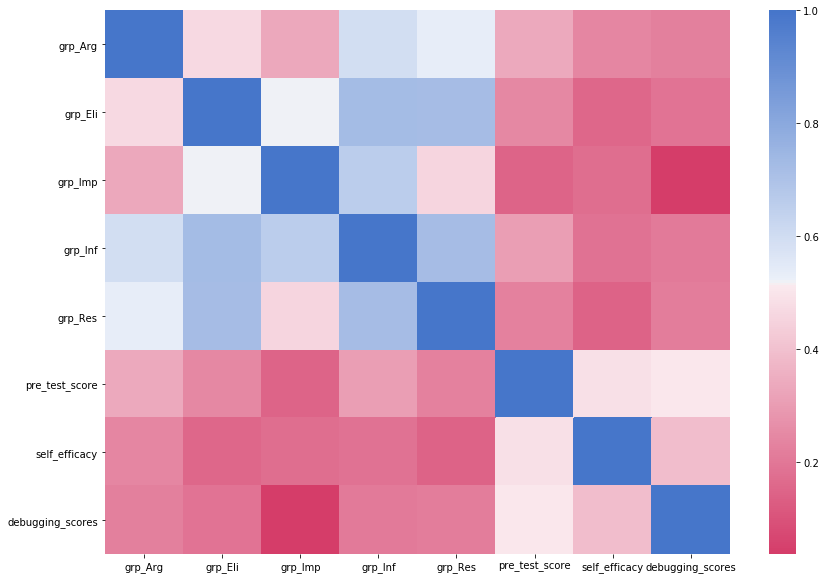

In [8]:
plt.figure(figsize=(14,10))

cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
corr_res = stud_df[cols_classes_groups+cols_tests].corr()
sns.heatmap(corr_res, cmap=cmap)

<Figure size 1008x720 with 0 Axes>

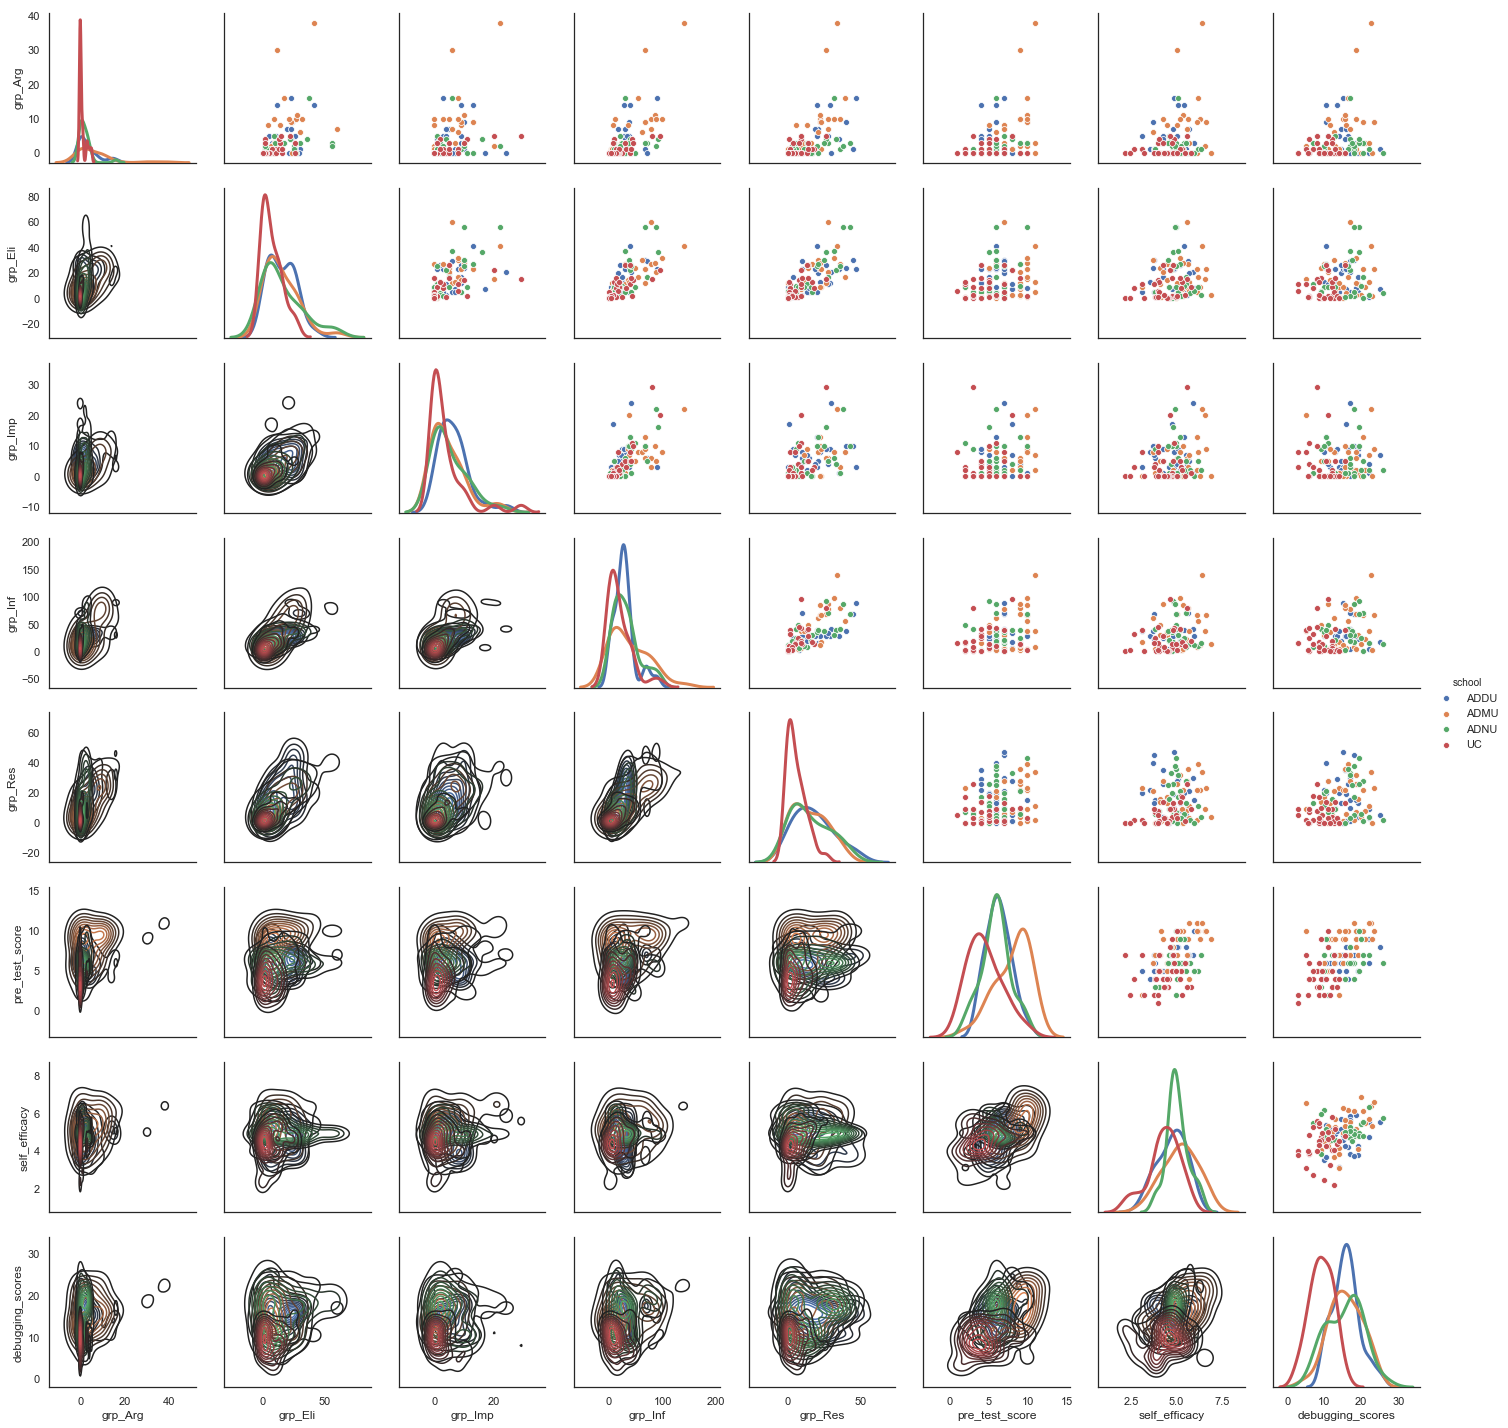

In [10]:
plt.figure(figsize=(14,10))

sns.set(style="white")

g = sns.PairGrid(stud_df[cols_classes_groups+cols_tests + ['school']], hue="school", diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
g.add_legend()

## Training Prep

In [36]:
# pred vs actual viz

def pred_vs_actual_viz():
    start = min(min(y_test), min(y_pred)) - 10 # minus 10 for buffer
    end = max(max(y_test), max(y_pred)) + 10 # added 10 for buffer
    line_coordinates = np.arange(start,end)

    plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.xlim(start, end)
    plt.ylim(start, end)
    plt.plot(line_coordinates,line_coordinates)
    plt.show()
    print("MSE: {}".format(metrics.mean_squared_error(y_pred, y_test)))

In [29]:
X = stud_df[cols_classes + ['pre_test_score', 'self_efficacy']]
y = stud_df['debugging_scores']

In [30]:
# Train-test split
# !! Important to split the data first to train-test before cross validation to avoid data leakage
train_perc = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_perc)
# train_idx = int(X.shape[0] * train_perc)
# X_train, y_train = X.iloc[:train_idx], y.iloc[:train_idx]
# X_test, y_test = X.iloc[train_idx:], y.iloc[train_idx:]

X_train.reset_index(inplace=True, drop=True)
y_train = y_train.values
X_test.reset_index(inplace=True, drop=True)
y_test = y_test.values


print("Train set shape: {}".format(X_train.shape))
print("Test set shape: {}".format(X_test.shape))

Train set shape: (89, 25)
Test set shape: (23, 25)


In [31]:
# Scaling predictors (X_train)
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled, columns=X_train.columns)

## Regression

In [39]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit() # with constant
y_pred = model.predict(scaler.fit_transform(sm.add_constant(X_test)))

# model = sm.OLS(y_train, X_train).fit() # without constant
# y_pred = model.predict(scaler.fit_transform(X_test))

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     2.587
Date:                Sun, 09 Sep 2018   Prob (F-statistic):            0.00123
Time:                        16:14:09   Log-Likelihood:                -237.41
No. Observations:                  89   AIC:                             526.8
Df Residuals:                      63   BIC:                             591.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.2806      1.599      4.554      0.000       4.086      10.475
ArgCcl            -4.8620      8.683     -0.560      0.578     -22.214      12.490
ArgCnt             1.9710      3.112      0.633      0.529      -4.247       8.189
ArgCon            -2.2825      2.359     -0.968      0.337      -6.996       2.431
ArgEla            -3.4697      4.899     -0.708      0.481     -13.259       6.320
ArgRsn            -1.3409      3.605     -0.372      0.711      -8.545       5.863
EliOpn             0.1170      5.627      0.021      0.983     -11.128      11.362
EliPrp            -5.6186      4.500     -1.249      0.216     -14.610       3.373
EliSet            -5.4498      4.695     -1.161      0.250     -14.833       3.933
EliVer             0.1307      3.649      0.036      0.972      -7.162       7.423
ImpAct           -11.8266      3.945     -2.998      0.004     -19.711      -3.942
ImpFoc             8.1183      3.909      2.077      0.042       0.306      15.930
InfAct             3.3132      6.608      0.501      0.618      -9.892      16.518
InfNeg             1.8008      4.245      0.424      0.673      -6.681      10.283
InfNeu            -3.7820      2.997     -1.262      0.212      -9.771       2.207
InfNon            -1.6967      5.008     -0.339      0.736     -11.705       8.311
InfPos             5.1183      7.663      0.668      0.507     -10.196      20.432
InfSoc            -0.1663      4.064     -0.041      0.967      -8.287       7.955
InfSol             6.7710      3.855      1.756      0.084      -0.932      14.474
InfStm             3.9197      4.297      0.912      0.365      -4.666      12.506
ResCfm             3.3321      4.329      0.770      0.444      -5.319      11.983
ResDen            -3.2138      3.256     -0.987      0.327      -9.721       3.293
ResSol             2.0820      2.651      0.785      0.435      -3.216       7.380
ResStm            -3.7612      3.233     -1.163      0.249     -10.222       2.700
pre_test_score     9.9093      2.672      3.709      0.000       4.570      15.248
self_efficacy      2.4046      2.977      0.808      0.422      -3.544       8.354
==============================================================================
Omnibus:                        4.155   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                3.462
Skew:                           0.454   Prob(JB):                        0.177
Kurtosis:                       3.330   Cond. No.                         37.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

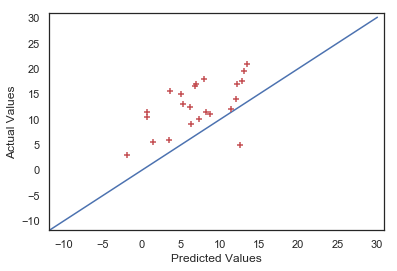

MSE: 49.412579299297406


In [37]:
pred_vs_actual_viz()